In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
dataset = pd.read_csv('data.csv')
dataset.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
# extract interested indicators
df3 = dataset[['VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays','Class']]
df3.head()

,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,16,2,20,Under-7,M
1,20,3,25,Under-7,M
2,7,0,30,Above-7,L
3,25,5,35,Above-7,L
4,50,12,50,Above-7,M


In [4]:
# We want to predict the class values hence it is the y axis (dependent variable)

y = df3['Class'].values
y[0:5]

array(['M', 'M', 'L', 'L', 'M'], dtype=object)

In [5]:
# set under 7 days absence as 0 and over 7 days as 1 as the string values cannot be used in model training

newAbsenceDays = df3['StudentAbsenceDays'].values
for i in range(len(newAbsenceDays)):
    if newAbsenceDays[i] == 'Under-7':
        newAbsenceDays[i] = 0
    else:
        newAbsenceDays[i] = 1

newAbsenceDays[:5]

array([0, 0, 1, 1, 1], dtype=object)

In [6]:
# Here we use 4 different indicators as independent variables
from sklearn import preprocessing
X = df3[['VisITedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']].values

# keep the original independent variables
X_original = df3[['VisITedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']]
# print(X[:5])
X = preprocessing.StandardScaler().fit(X).transform(X)
# print(X[:5])

In [7]:
X_original.head()

,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,16,2,20,0
1,20,3,25,0
2,7,0,30,1
3,25,5,35,1
4,50,12,50,1


In [8]:
# Split the train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X_train[:5]

Train set: (384, 4) (384,)
Test set: (96, 4) (96,)


array([[-1.23459712, -0.97499354, -0.87954632,  1.23007683],
       [ 0.61134087,  0.90587174,  0.35193926, -0.81295735],
       [ 0.79290854,  1.69583515,  1.04012238,  1.23007683],
       [-0.90172306, -0.0345609 , -1.0968673 ,  1.23007683],
       [-1.29511968, -0.67405509, -1.0968673 ,  1.23007683]])

In [9]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7291666666666666 with k= 6


In [10]:
#REBUILDING THE MODEL WITH BEST K
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [11]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Dtree.fit(X_train,y_train)
Dtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
# Support Vector Machine

from sklearn import svm
supMac = svm.SVC(kernel='rbf', gamma='auto')
supMac.fit(X_train, y_train) 

SVC(gamma='auto')

In [13]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear', multi_class='auto').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
# This part is testing and analysis

In [15]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [16]:
knn_yhat = neigh.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat,average='weighted'))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )
print("KNN accuracy: %.2f" % neigh.score(X_test, y_test) )

KNN Jaccard index: 0.58
KNN F1-score: 0.73
KNN accuracy: 0.73


In [17]:
dtree_yhat = Dtree.predict(X_test)
print("Decision Tree Jaccard index: %.2f" % jaccard_score(y_test, dtree_yhat,average='weighted'))
print("Decision Tree F1-score: %.2f" % f1_score(y_test, dtree_yhat, average='weighted'))

Decision Tree Jaccard index: 0.48
Decision Tree F1-score: 0.64


In [18]:
svm_yhat = supMac.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, svm_yhat,average='weighted'))
print("SVM F1-score: %.2f" % f1_score(y_test, svm_yhat, average='weighted') )

SVM Jaccard index: 0.53
SVM F1-score: 0.69


In [19]:
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat,average='weighted'))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.45
LR F1-score: 0.61
LR LogLoss: 0.86


In [20]:
# KNN

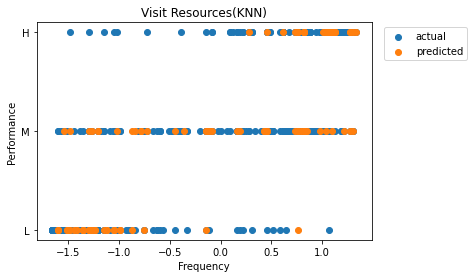

In [21]:
# Visit Resource
newX_test = [item[0] for item in X_test]
newX_train = [item[0] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,knn_yhat, label="predicted")
plt.title("Visit Resources(KNN)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

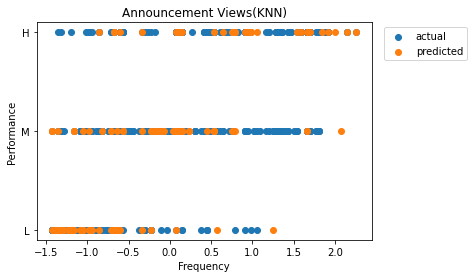

In [22]:
# Announcement Views
newX_test = [item[1] for item in X_test]
newX_train = [item[1] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,knn_yhat, label="predicted")
plt.title("Announcement Views(KNN)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

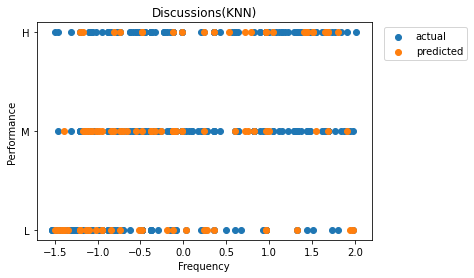

In [23]:
# Discussions
newX_test = [item[2] for item in X_test]
newX_train = [item[2] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,knn_yhat, label="predicted")
plt.title("Discussions(KNN)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

In [24]:
# Absence Days
newX_test = [item[3] for item in X_test]
newX_train = [item[3] for item in X_train]

# # predicted results
# print(newX_test)
# print(knn_yhat)

data = {'absence': newX_test,
        'class': knn_yhat,}

df = pd.DataFrame(data) # 0 < 7 days, 1 > 7 days
df

df.groupby(['absence'])['class'].value_counts(normalize=True)

absence    class
-0.812957  H        0.500000
           M        0.481481
           L        0.018519
 1.230077  L        0.666667
           M        0.333333
Name: class, dtype: float64

In [25]:
# Decision Tree

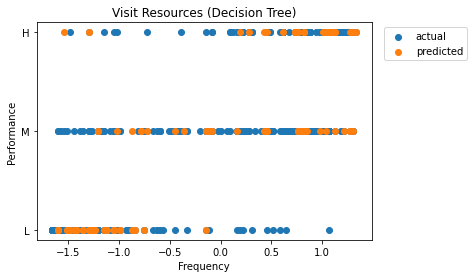

In [26]:
# Visit Resource
newX_test = [item[0] for item in X_test]
newX_train = [item[0] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,dtree_yhat, label="predicted")
plt.title("Visit Resources (Decision Tree)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

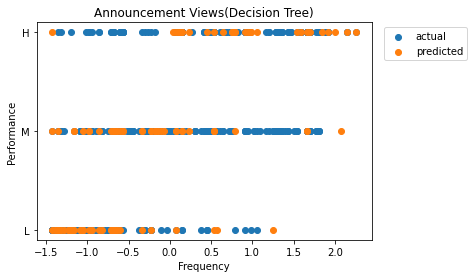

In [27]:
# Announcement Views
newX_test = [item[1] for item in X_test]
newX_train = [item[1] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,dtree_yhat, label="predicted")
plt.title("Announcement Views(Decision Tree)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

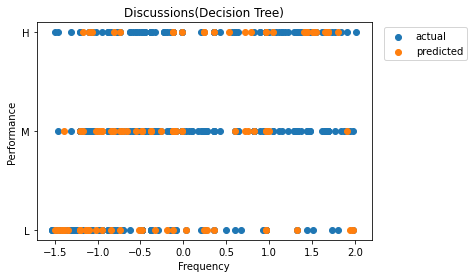

In [28]:
# Discussions
newX_test = [item[2] for item in X_test]
newX_train = [item[2] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,dtree_yhat, label="predicted")
plt.title("Discussions(Decision Tree)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

In [29]:
# absence days
newX_test = [item[3] for item in X_test]
newX_train = [item[3] for item in X_train]

# # predicted results
# print(newX_test)
# print(dtree_yhat)

data = {'absence': newX_test,
        'class': dtree_yhat,}

df = pd.DataFrame(data) # 0 < 7 days, 1 > 7 days
df

df.groupby(['absence'])['class'].value_counts(normalize=True)

absence    class
-0.812957  H        0.537037
           M        0.407407
           L        0.055556
 1.230077  L        0.666667
           M        0.333333
Name: class, dtype: float64

In [30]:
# svm

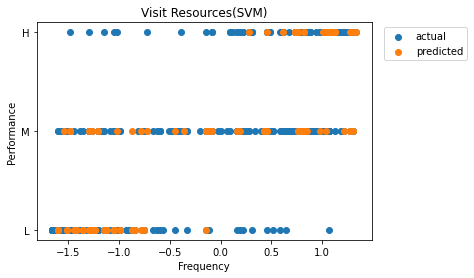

In [31]:
# visit resource
newX_test = [item[0] for item in X_test]
newX_train = [item[0] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,svm_yhat, label="predicted")
plt.title("Visit Resources(SVM)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

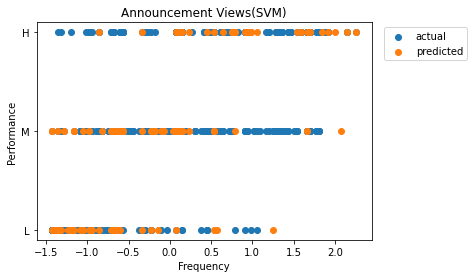

In [32]:
# announcement views
newX_test = [item[1] for item in X_test]
newX_train = [item[1] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,svm_yhat, label="predicted")
plt.title("Announcement Views(SVM)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

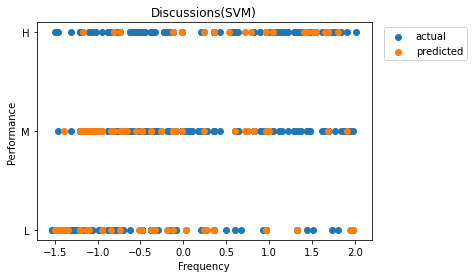

In [33]:
# Discussions
newX_test = [item[2] for item in X_test]
newX_train = [item[2] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,svm_yhat, label="predicted")
plt.title("Discussions(SVM)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

In [34]:
# absence days
newX_test = [item[3] for item in X_test]
newX_train = [item[3] for item in X_train]

# # predicted results
# print(newX_test)
# print(dtree_yhat)

data = {'absence': newX_test,
        'class': svm_yhat,}

df = pd.DataFrame(data) # 0 < 7 days, 1 > 7 days
df

df.groupby(['absence'])['class'].value_counts(normalize=True)

absence    class
-0.812957  H        0.500000
           M        0.500000
 1.230077  L        0.690476
           M        0.309524
Name: class, dtype: float64

In [35]:
# logistic regression

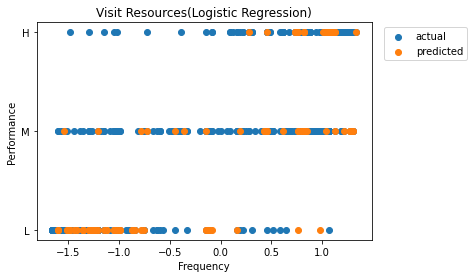

In [36]:
# visit resource
newX_test = [item[0] for item in X_test]
newX_train = [item[0] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,LR_yhat, label="predicted")
plt.title("Visit Resources(Logistic Regression)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

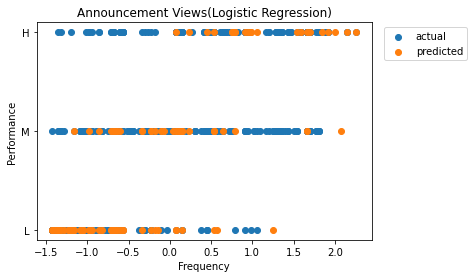

In [37]:
# announcement views
newX_test = [item[1] for item in X_test]
newX_train = [item[1] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,LR_yhat, label="predicted")
plt.title("Announcement Views(Logistic Regression)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

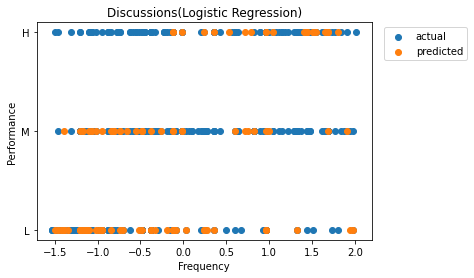

In [38]:
# Discussions
newX_test = [item[2] for item in X_test]
newX_train = [item[2] for item in X_train]
newX_test
plt.scatter(newX_train, y_train, label="actual")
plt.scatter(newX_test,LR_yhat, label="predicted")
plt.title("Discussions(Logistic Regression)")
plt.xlabel("Frequency")
plt.ylabel("Performance")
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

In [39]:
# absence days
newX_test = [item[3] for item in X_test]
newX_train = [item[3] for item in X_train]

# # predicted results
# print(newX_test)
# print(dtree_yhat)

data = {'absence': newX_test,
        'class': LR_yhat,}

df = pd.DataFrame(data) # 0 < 7 days, 1 > 7 days
df

df.groupby(['absence'])['class'].value_counts(normalize=True)

absence    class
-0.812957  M        0.462963
           H        0.407407
           L        0.129630
 1.230077  L        0.857143
           M        0.142857
Name: class, dtype: float64

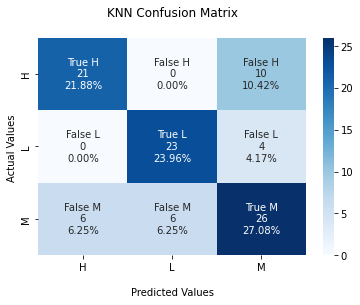

In [40]:
# Confusion Matrix (KNN)
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, knn_yhat)

group_names = ['True H','False H','False H','False L','True L','False L','False M','False M','True M']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('KNN Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Class labels
ax.xaxis.set_ticklabels(['H','L','M'])
ax.yaxis.set_ticklabels(['H','L','M'])

# Display the visualization of the Confusion Matrix.
plt.show()

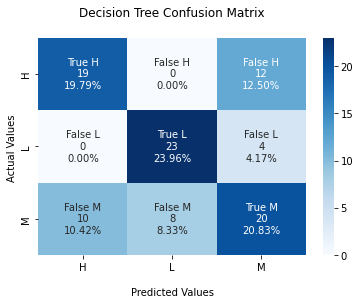

In [41]:
# Confusion Matrix (Decision Tree)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, dtree_yhat)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
                     
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Decision Tree Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Class labels
ax.xaxis.set_ticklabels(['H','L','M'])
ax.yaxis.set_ticklabels(['H','L','M'])

# Display the visualization of the Confusion Matrix.
plt.show()

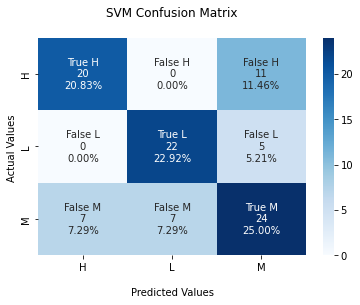

In [42]:
# Confusion Matrix (SVM)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, svm_yhat)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('SVM Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Class labels
ax.xaxis.set_ticklabels(['H','L','M'])
ax.yaxis.set_ticklabels(['H','L','M'])

# Display the visualization of the Confusion Matrix.
plt.show()

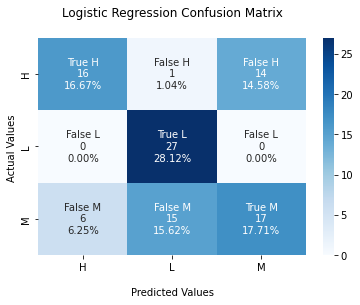

In [43]:
# Confusion Matrix (Logistic Regression)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, LR_yhat)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Logistic Regression Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Class labels
ax.xaxis.set_ticklabels(['H','L','M'])
ax.yaxis.set_ticklabels(['H','L','M'])

# Display the visualization of the Confusion Matrix.
plt.show()

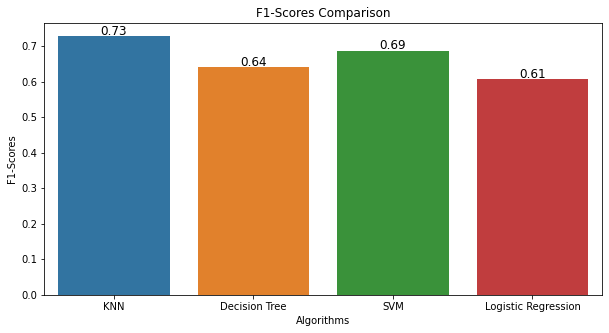

In [44]:
# F1 Scores Visualization

# F1 Scores for Each Algorithm
F1_KNN = f1_score(y_test, knn_yhat, average='weighted')
F1_DT = f1_score(y_test, dtree_yhat, average='weighted')
F1_SVM = f1_score(y_test, svm_yhat, average='weighted')
F1_LR = f1_score(y_test, LR_yhat, average='weighted')

# List Parameters for Bar Chart
algo = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
algo_f1 = [F1_KNN, F1_DT, F1_SVM, F1_LR]
data = {"Algorithms": algo,
        "F1-Scores": algo_f1}
df = pd.DataFrame(data, columns=['Algorithms', 'F1-Scores'])

# Defining Plot Size
fig = plt.figure(figsize = (10, 5))
 
# Bar Plot
plots = sns.barplot(x="Algorithms", y="F1-Scores", data=df)

# Annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 5),
                    textcoords='offset points')
plt.title("F1-Scores Comparison")
plt.show()

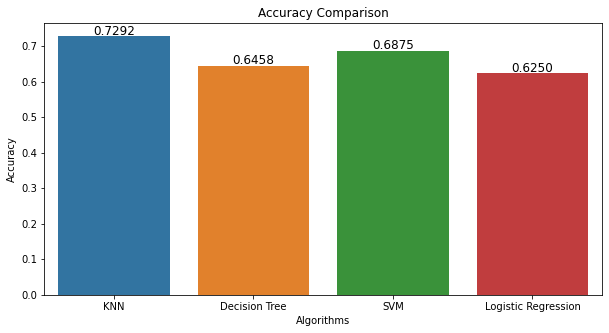

In [45]:
# Accuracy Visualization

# Accuracy for Each Algorithm
acc_KNN = neigh.score(X_test, y_test)
acc_DT = Dtree.score(X_test, y_test)
acc_SVM = supMac.score(X_test, y_test)
acc_LR = LR.score(X_test, y_test)

# List Parameters for Bar Chart
algo = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
algo_acc = [acc_KNN, acc_DT, acc_SVM, acc_LR]

data = {"Algorithms": algo,
        "Accuracy": algo_acc}
df = pd.DataFrame(data, columns=['Algorithms', 'Accuracy'])

# Defining Plot Size
fig = plt.figure(figsize = (10, 5))
 
# Bar Plot
plots = sns.barplot(x="Algorithms", y="Accuracy", data=df)

# Annotation
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 5),
                    textcoords='offset points')
plt.title("Accuracy Comparison")
plt.show()